# **Image filtering**

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


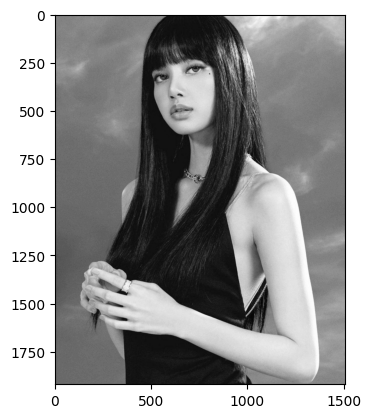

In [96]:
url = '/content/drive/MyDrive/XuLyAnh/LabThucHanh/Image/Lalisa.png'
img = cv2.imread(url, 0)
plt.imshow(img, cmap='gray')

### Convolution

In [117]:
ker_size = 15
kernel = np.ones((ker_size, ker_size), dtype=np.float32) / ker_size**2
print(kernel)

[[0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.

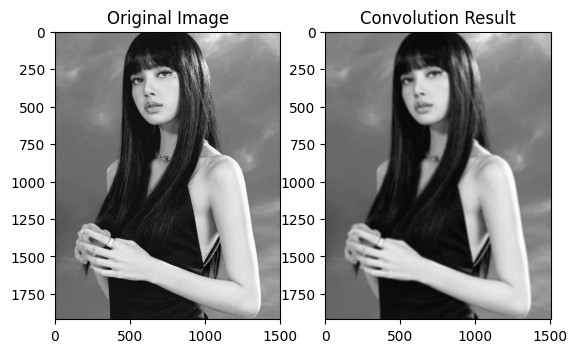

In [118]:
#Convolution
result = cv2.filter2D(img, -1, kernel, (-1, -1), delta=0, borderType = cv2.BORDER_DEFAULT)

plt.figure()
plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original Image")
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("Convolution Result")
plt.show()

### Box blur

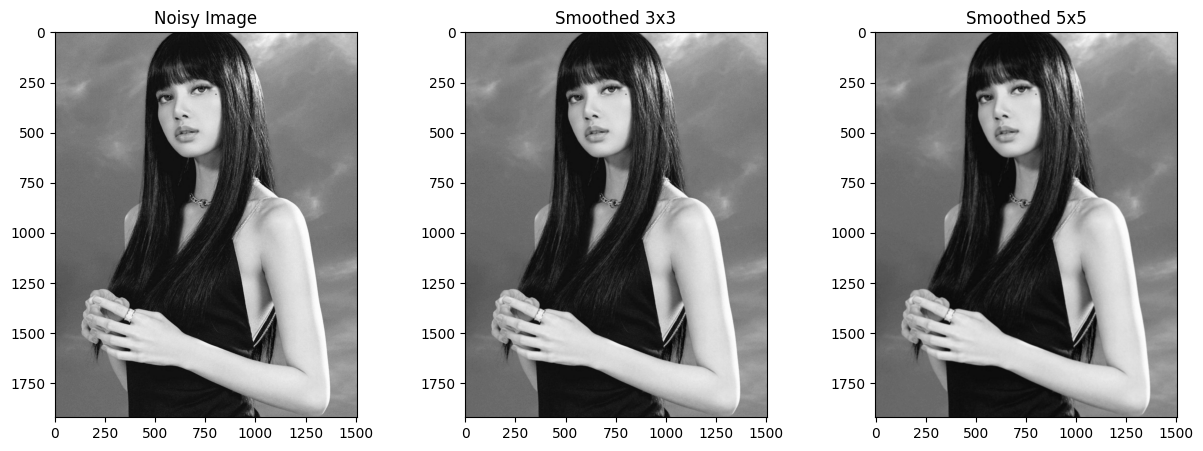

In [124]:
#Box blur
#Apply box filter - kernel size 3
dst1_box = cv2.blur(img,(3,3),(-1,-1))
#Apply box filter - kernel size 5
dst2_box = cv2.blur(img,(5,5),(-1,-1))

plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Noisy Image")
plt.subplot(132);plt.imshow(dst1_box, cmap='gray');plt.title("Smoothed 3x3")
plt.subplot(133);plt.imshow(dst2_box, cmap='gray');plt.title("Smoothed 5x5")
plt.show()


### Gausian filtering

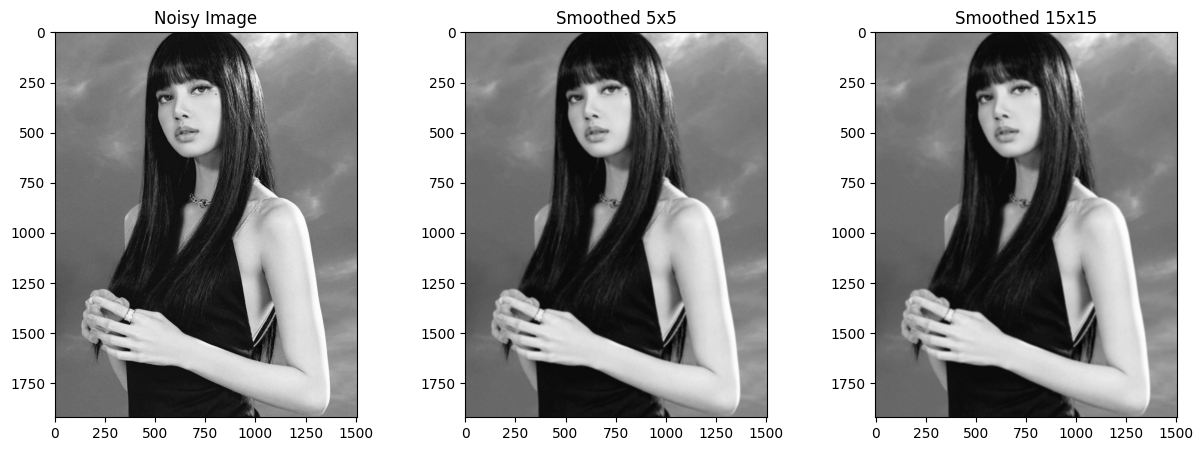

In [125]:
#Gaussian filtering
#Apply gaussian blur with kernel 5x5 and sigmaX=0, sigmaY=0; output image dst1
dst1_gau = cv2.GaussianBlur(img,(ker_size,ker_size),sigmaX=0,sigmaY=0)
#Apply gaussian blur with kernel 15x15 and sigmaX=3, sigmaY=3; ; output image dst2
dst2_gau = cv2.GaussianBlur(img,(ker_size,ker_size),sigmaX=3,sigmaY=3)

plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Noisy Image")
plt.subplot(132);plt.imshow(dst1_gau, cmap='gray');plt.title("Smoothed 5x5")
plt.subplot(133);plt.imshow(dst2_gau, cmap='gray');plt.title("Smoothed 15x15")
plt.show()

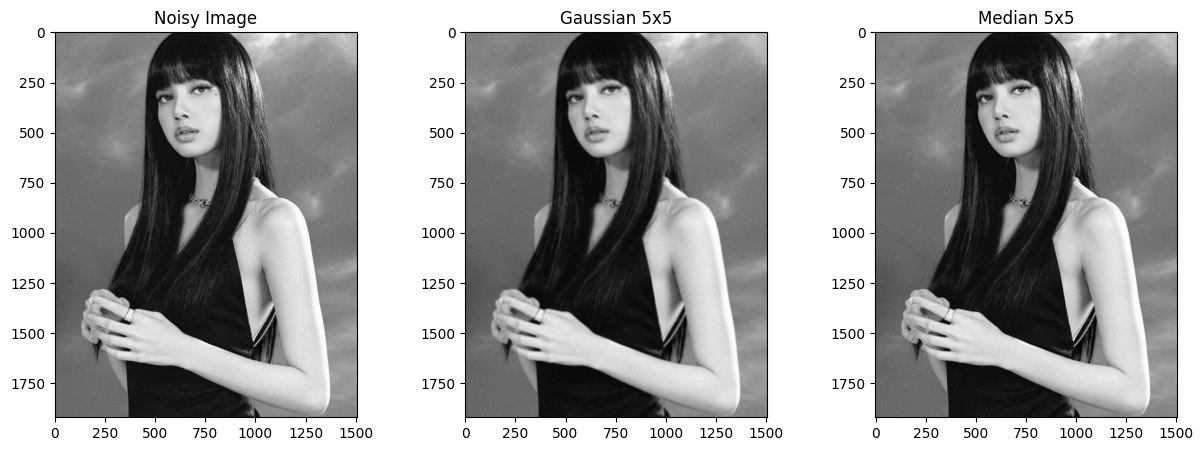

In [127]:
#Median filter
kernelSize = 5
# Performing Median Blurring with kernelSize=5 and store it in numpy array "dst2"
dst2_med = cv2.medianBlur(img,kernelSize)

plt.figure(figsize=[15,5])
plt.subplot(131);plt.imshow(img, cmap='gray');plt.title("Noisy Image")
plt.subplot(132);plt.imshow(dst1_gau, cmap='gray');plt.title("Gaussian 5x5")
plt.subplot(133);plt.imshow(dst2_med, cmap='gray');plt.title("Median 5x5")
plt.show()

# **Image Sharpening**

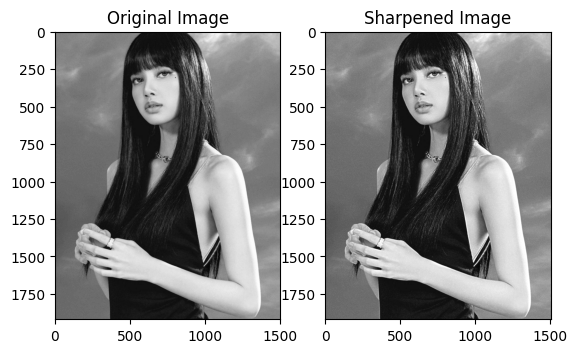

In [152]:
def sharpen(img):
  smoothed_img = cv2.GaussianBlur(img, (25, 25), 5)
  details = cv2.subtract(img, smoothed_img)
  unsharp_img = cv2.add(img, details)
  return unsharp_img

img = cv2.imread(url, 0)
unsharp_img = sharpen(img)

plt.subplot(121);plt.imshow(img, cmap='gray');plt.title("Original Image")
plt.subplot(122);plt.imshow(unsharp_img, cmap='gray');plt.title("Sharpened Image")
plt.show()